In [1]:
#pip install opencv-python


In [15]:
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
from scipy.spatial.distance import cdist

In [4]:
# Define the points to track
path_tp = 'Triple_points_pos/'
tp = {}
for i in range(1,60):
    name = str(i) + '.txt'
    tp_name = path_tp + name
    tp[i] = np.loadtxt(tp_name)
points_to_track = tp[1]

# Read the .gif file using imageio
vid = imageio.get_reader('plots/plots.gif', 'ffmpeg')

# Create a Lucas-Kanade optical flow object
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Read the first frame
frame = vid.get_data(0)
old_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

# Initialize the points for tracking
old_points = np.array([[[50, 50]], [[100, 100]], [[150, 150]], [[200, 200]]], dtype=np.float32)

# Create an empty array to store the trajectory of each point
trajectory = np.zeros((points_to_track.shape[0], 2))

# Loop through the frames in the .gif file
for i in range(1, 60):
    # Read the next frame
    frame = vid.get_data(i)

    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Calculate the optical flow using Lucas-Kanade algorithm
    new_points, status, error = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, old_points, None, **lk_params)

    # Select only the points that were successfully tracked
    good_new = new_points[status == 1]
    good_old = old_points[status == 1]

    # Update the trajectory array with the new positions of each point
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        trajectory[i] += new - old

    # Draw the trajectory of each point on the frame
    for i, point in enumerate(points_to_track):
        x, y = point
        cv2.circle(frame, (int(x), int(y)), 3, (0, 0, 255), -1)
        x_traj, y_traj = trajectory[i]
        cv2.line(frame, (int(x), int(y)), (int(x_traj), int(y_traj)), (0, 255, 0), 2)

    # Show the frame
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

    # Update the old points and old grayscale image for the next iteration
    old_gray = frame_gray.copy()
    old_points = good_new.reshape(-1, 1, 2)

# Release the VideoCapture object and close all windows
cv2.destroyAllWindows()


TypeError: 'NoneType' object is not subscriptable

In [5]:
import cv2
import sys
 
#(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')￼
 
if __name__ == '__main__' :
 
    # Set up tracker.
    # Instead of MIL, you can also use
 
    tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
    tracker_type = tracker_types[2]
 
 
    tracker = cv2.Tracker_create(tracker_type)
    
 
    # Read video
    video = cv2.VideoCapture("pltos/plots.gif")
 
    # Exit if video not opened.
    if not video.isOpened():
        print("Could not open video")
        sys.exit()
 
    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print('Cannot read video file')
        sys.exit()
     
    # Define an initial bounding box
    bbox = (287, 23, 86, 320)
 
    # Uncomment the line below to select a different bounding box
    bbox = cv2.selectROI(frame, False)
 
    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)
 
    while True:
        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break
         
        # Start timer
        timer = cv2.getTickCount()
 
        # Update tracker
        ok, bbox = tracker.update(frame)
 
        # Calculate Frames per second (FPS)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);
 
        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
        else :
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)
 
        # Display tracker type on frame
        cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);
     
        # Display FPS on frame
        cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
 
        # Display result
        cv2.imshow("Tracking", frame)
 
        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : break

AttributeError: module 'cv2' has no attribute 'Tracker_create'

In [5]:
from __future__ import print_function
import sys
import cv2
from random import randint
 
trackerTypes = ['BOOSTING', 'MIL', 'KCF','TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
 
def createTrackerByName(trackerType):
  # Create a tracker based on tracker name
  if trackerType == trackerTypes[0]:
    tracker = cv2.TrackerBoosting_create()
  elif trackerType == trackerTypes[1]:
    tracker = cv2.TrackerMIL_create()
  elif trackerType == trackerTypes[2]:
    tracker = cv2.TrackerKCF_create()
  elif trackerType == trackerTypes[3]:
    tracker = cv2.TrackerTLD_create()
  elif trackerType == trackerTypes[4]:
    tracker = cv2.TrackerMedianFlow_create()
  elif trackerType == trackerTypes[5]:
    tracker = cv2.TrackerGOTURN_create()
  elif trackerType == trackerTypes[6]:
    tracker = cv2.TrackerMOSSE_create()
  elif trackerType == trackerTypes[7]:
    tracker = cv2.TrackerCSRT_create()
  else:
    tracker = None
    print('Incorrect tracker name')
    print('Available trackers are:')
    for t in trackerTypes:
      print(t)
 
  return tracker

In [6]:
# Set video to load
videoPath = "plots/plots.gif"
 
# Create a video capture object to read videos
cap = cv2.VideoCapture(videoPath)
 
# Read first frame
success, frame = cap.read()
# quit if unable to read the video file
if not success:
  print('Failed to read video')
  sys.exit(1)

In [ ]:
boxes = []
colors = [] 
 
# OpenCV's selectROI function doesn't work for selecting multiple objects in Python
# So we will call this function in a loop till we are done selecting all objects
while True:
  # draw bounding boxes over objects
  # selectROI's default behaviour is to draw box starting from the center
  # when fromCenter is set to false, you can draw box starting from top left corner
  bbox = cv2.selectROI('MultiTracker', frame)
  bboxes.append(bbox)
  colors.append((randint(0, 255), randint(0, 255), randint(0, 255)))
  print("Press q to quit selecting boxes and start tracking")
  print("Press any other key to select next object")
  k = cv2.waitKey(0) & 0xFF
  if (k == 113):  # q is pressed
    break
 
print('Selected bounding boxes {}'.format(bboxes))

## random

In [ ]:
cap = cv2.VideoCapture('plots/plots.gif', 'ffmpeg)
# Object detection from Stable camera
object_detector = cv2.createBackgroundSubtractorMOG2()
while True:
    ret, frame = cap.read()
   
    # 1. Object Detection
    mask = object_detector.apply(frame)

In [71]:
import cv2
import numpy as np

# Read the video file
cap = cv2.VideoCapture("plots/plots.gif")

# Set up the parameters for the point tracking
feature_params = dict(maxCorners=376, qualityLevel=0.3, minDistance=0, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Take the first frame and detect the points
ret, frame = cap.read()
old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Create a dictionary to store the position of each point in each frame
tracks = {}

# Loop through each point and add it to the dictionary
for i in range(len(p0)):
    tracks[i] = []

# Loop through the frames and track the points
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate the optical flow for the current frame
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # Update the position of each point in the dictionary
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        tracks[i].append(new)

    # Update the previous frame and points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

# Release the video capture object
cap.release()

# Print the dictionary
print(tracks[0])


[array([701.9431, 816.1856], dtype=float32), array([701.7392 , 810.51404], dtype=float32), array([707.83417, 810.07355], dtype=float32), array([707.3339, 803.1545], dtype=float32), array([701.5913, 803.3132], dtype=float32), array([701.57404, 809.0221 ], dtype=float32), array([701.3237 , 809.12317], dtype=float32), array([701.35815, 808.8917 ], dtype=float32), array([701.73846, 809.0013 ], dtype=float32), array([701.732 , 809.0788], dtype=float32), array([701.7258 , 809.05566], dtype=float32), array([701.4665, 808.8201], dtype=float32), array([696.7956 , 803.06104], dtype=float32), array([696.80334, 802.88055], dtype=float32), array([696.3725, 802.4879], dtype=float32), array([690.6416, 802.7826], dtype=float32), array([701.9684, 797.9898], dtype=float32), array([707.8355, 802.8308], dtype=float32), array([707.83417, 802.8875 ], dtype=float32), array([715.70825, 808.655  ], dtype=float32), array([715.6939, 808.6563], dtype=float32), array([720.744 , 814.5518], dtype=float32), array([72

In [72]:
tracks[4]

[array([540.7056, 595.071 ], dtype=float32),
 array([544.89795, 598.25586], dtype=float32),
 array([545.3543, 597.9478], dtype=float32),
 array([545.0336, 598.3148], dtype=float32),
 array([543.6402 , 594.71326], dtype=float32),
 array([541.16425, 594.69574], dtype=float32),
 array([541.2969, 594.6217], dtype=float32),
 array([547.3289, 594.6775], dtype=float32),
 array([552.1378 , 594.73193], dtype=float32),
 array([552.1417, 594.7247], dtype=float32),
 array([558.46216, 594.6393 ], dtype=float32),
 array([558.4598 , 594.63513], dtype=float32),
 array([563.5319 , 594.75055], dtype=float32),
 array([563.4752, 594.5165], dtype=float32),
 array([563.53864, 594.79315], dtype=float32),
 array([568.5005, 594.5986], dtype=float32),
 array([568.4505 , 594.75116], dtype=float32),
 array([568.3656, 594.7092], dtype=float32),
 array([568.3593, 594.7118], dtype=float32),
 array([568.3958, 595.0185], dtype=float32),
 array([574.4495 , 600.08405], dtype=float32),
 array([574.5154, 600.5677], dtype=

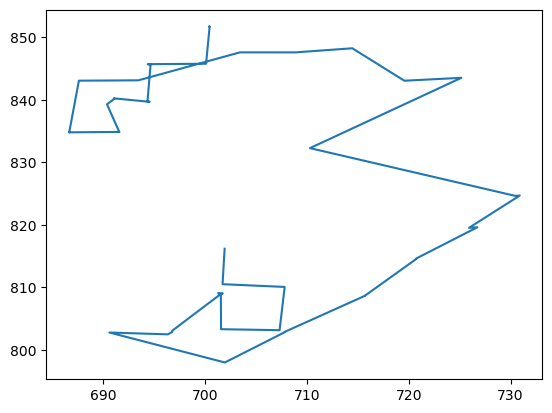

In [76]:
test =np.array(tracks[0])
plt.plot(test[:,0],test[:,1])
plt.show()

In [77]:
test[:,0]

array([701.9431 , 701.7392 , 707.83417, 707.3339 , 701.5913 , 701.57404,
       701.3237 , 701.35815, 701.73846, 701.732  , 701.7258 , 701.4665 ,
       696.7956 , 696.80334, 696.3725 , 690.6416 , 701.9684 , 707.8355 ,
       707.83417, 715.70825, 715.6939 , 720.744  , 720.73364, 726.73975,
       725.9174 , 730.89905, 730.4449 , 710.3134 , 725.1665 , 719.57526,
       714.46735, 708.87054, 703.4464 , 693.49066, 687.6467 , 686.6966 ,
       686.6664 , 691.63257, 691.5996 , 690.40466, 691.12885, 691.14044,
       691.1472 , 691.07666, 694.5994 , 694.37964, 694.3736 , 694.68146,
       694.68066, 694.66595, 694.58264, 694.407  , 700.0938 , 700.12445,
       700.4717 , 700.4684 , 700.41315, 700.4319 ], dtype=float32)

In [78]:
test[:,1]

array([816.1856 , 810.51404, 810.07355, 803.1545 , 803.3132 , 809.0221 ,
       809.12317, 808.8917 , 809.0013 , 809.0788 , 809.05566, 808.8201 ,
       803.06104, 802.88055, 802.4879 , 802.7826 , 797.9898 , 802.8308 ,
       802.8875 , 808.655  , 808.6563 , 814.5518 , 814.6188 , 819.622  ,
       819.5283 , 824.69476, 824.64404, 832.2778 , 843.5238 , 843.06006,
       848.25085, 847.5941 , 847.5973 , 843.1254 , 843.06775, 834.7831 ,
       834.8058 , 834.8672 , 834.90454, 839.2864 , 840.18475, 840.17584,
       840.1749 , 840.24   , 839.6874 , 839.7309 , 839.7328 , 845.6587 ,
       845.6579 , 845.6598 , 845.67126, 845.70575, 845.77704, 845.78876,
       851.71326, 851.7126 , 851.7313 , 851.7379 ], dtype=float32)

In [79]:
for i in tracks.keys():
    tracks[i] = np.array(tracks[i])
#tracks

In [81]:
with open('tracks.pickle', 'wb') as handle:
    pickle.dump(tracks, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [84]:
type(frame)

NoneType

In [94]:
import cv2
import numpy as np

# Load the GIF as a list of frames
gif = cv2.VideoCapture('plots/plots.gif')
n_frames = int(gif.get(cv2.CAP_PROP_FRAME_COUNT))
print('Number of frames:', n_frames)

# Define the threshold value
thresh_val = 50

# Define the scaling factor for position normalization
scale_factor = 200.0 / 640.0

# Initialize the dictionary to store point positions
point_positions = {}

# Iterate over all frames in the GIF
for i in range(n_frames):
    # Read the next frame from the GIF
    ret, frame = gif.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image based on brightness
    thresh = cv2.threshold(gray, thresh_val, 255, cv2.THRESH_BINARY)[1]

    # Find the contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize the dictionary to store point positions for this frame
    point_positions_frame = {}
    for j in range(len(contours)):
        # Assume that the jth point is the centroid of the jth contour
        centroid = np.mean(contours[j], axis=0)[0]
        # Scale the position to be between 0 and 200 in both axes
        x_norm = centroid[0] * scale_factor
        y_norm = centroid[1] * scale_factor
        point_positions_frame[j] = [x_norm, y_norm]

    # Add the point positions for this frame to the dictionary
    for j, pos in point_positions_frame.items():
        if j not in point_positions:
            point_positions[j] = []
        point_positions[j].append(pos)


Number of frames: 59


In [97]:
point_positions

{0: [[234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21875, 234.21875],
  [234.21

## equalising algorithm

In [9]:
def icp(A, B, init_transform=None, max_iterations=50, tolerance=1e-8):
    """
    Iterative Closest Point (ICP) algorithm for point set registration.
    A and B are the input point sets.
    init_transform is an optional initial transformation matrix.
    max_iterations is the maximum number of iterations.
    tolerance is the convergence tolerance.
    Returns the final transformation matrix that aligns A with B.
    """
    if init_transform is None:
        # Initialize the transformation to an identity matrix
        transform = np.eye(3)
    else:
        transform = init_transform
    
    for i in range(max_iterations):
        # Find the nearest neighbors in B for each point in A
        tree = KDTree(B)
        distances, indices = tree.query(A)
        
        # Compute the centroid of each point set
        centroid_A = np.mean(A, axis=0)
        centroid_B = np.mean(B[indices], axis=0)
        
        # Compute the cross-covariance matrix
        H = np.dot((A - centroid_A).T, B[indices] - centroid_B)
        
        # Compute the optimal rotation matrix using SVD
        U, _, Vt = np.linalg.svd(H)
        R = np.dot(U, Vt)
        
        # Convert the 2x2 rotation matrix and 2x1 translation vector to a 3x3 matrix
        T = np.eye(3)
        T[:2, :2] = R
        t = centroid_B - np.dot(R, centroid_A)
        T[:2, 2] = t
        
        
        # Apply the transformation to A
        A = np.dot(A, T[:2, :2].T) + T[:2, 2]
        
        # Update the transformation matrix
        transform = np.dot(transform, T)
        
        # Check for convergence
        if np.sum(distances) < tolerance:
            break
    
    return transform


In [10]:
A = tp[1].copy()
B = tp[2].copy()

# Call the icp function to find the optimal transformation between A and B
transform = icp(A, B)

# Apply the transformation to A to align it with B
A_aligned = np.dot(A, transform[:2, :2].T) + transform[:2, 2]

# Now A_aligned should be aligned with B


In [3]:
path_tp = 'Triple_points_pos/'
tp = {}
for i in range(1,60):
    name = str(i) + '.txt'
    tp_name = path_tp + name
    tp[i] = np.loadtxt(tp_name)

In [28]:
for i in range(len(B)):
    if B[i][1] < 5 and B[i][1] >3:
        print(B[i])

In [16]:
mat = cdist(A,B)

In [23]:
(np.unique(mat.argmin(axis = 0))).shape

(351,)

In [31]:
tp[2][:][1].max()

66.0

In [37]:
A_aligned.min()

-13.091235456851463

## Hungarian Algorithm 

### test

In [14]:
import numpy as np
from hungarian_algorithm import algorithm
from scipy.spatial.distance import cdist
import pandas as pd

In [15]:
path_tp = 'Triple_points_pos/'
tp = {}
for i in range(1,60):
    name = str(i) + '.txt'
    tp_name = path_tp + name
    tp[i] = np.loadtxt(tp_name)

In [16]:
tp[1].shape

(376, 2)

In [43]:
mat1 = tp[1]
mat2 = tp[2]
dist_mat = cdist(mat2,mat1)
print(mat1.shape, mat2.shape, dist_mat.shape)
type(dist_mat)

(376, 2) (361, 2) (361, 376)


numpy.ndarray

In [45]:
#creating a bipartite graph with dictionary
col_name = np.array([i for i in range(len(mat1))])
df = pd.DataFrame(dist_mat, columns = col_name)
df

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
0,61.032778,79.056942,21.213203,140.174891,93.263069,76.321688,20.248457,31.048349,33.837849,41.761226,...,202.039600,200.860648,196.840037,192.213423,207.337888,201.467119,201.136769,191.041880,228.114007,213.025820
1,19.026298,1.000000,59.000000,60.133186,13.601471,5.656854,99.080775,110.113578,112.285351,120.337027,...,185.097272,186.386695,187.672587,191.366141,187.024063,187.451327,187.523332,202.780670,195.143537,191.167466
2,1.414214,17.000000,41.000000,78.102497,31.256999,14.560220,81.098705,92.135769,94.339811,102.396289,...,185.388781,186.096749,186.131674,187.949461,188.175450,187.066833,187.042776,196.743488,199.612124,192.761511
3,39.115214,57.035077,2.236068,118.016948,71.028163,54.037024,41.048752,52.086467,54.332311,62.393910,...,190.244579,189.662859,186.935818,184.458667,194.797331,190.394328,190.160459,186.868938,212.896689,200.192407
4,14.560220,5.000000,54.083269,65.007692,18.027756,1.414214,94.005319,105.019046,107.116759,115.156415,...,182.002747,183.133831,184.089652,187.320581,184.173831,184.173831,184.219977,198.156504,193.310631,188.448932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,188.066478,187.451327,192.338244,197.395542,184.981080,183.273020,201.777105,205.766858,204.071066,207.171427,...,8.246211,2.236068,11.045361,31.016125,17.000000,1.000000,0.000000,62.008064,54.147945,22.360680
357,188.066478,188.409129,190.247208,201.357890,186.702973,184.089652,197.772597,201.295802,199.461776,202.237484,...,18.110770,12.041595,1.414214,21.023796,27.000000,11.000000,10.000000,52.009614,64.124878,32.249031
358,196.451012,201.479527,187.771137,228.002193,203.494472,196.654519,184.439692,185.148589,182.584227,183.357574,...,70.028566,64.007812,51.009803,31.016125,79.000000,63.000000,62.000000,1.000000,116.068945,84.095184
359,200.202398,194.586742,214.709106,186.967912,188.095720,191.366141,232.800344,238.801173,237.766692,242.243679,...,47.265209,53.150729,66.121101,86.092973,38.118237,54.083269,55.081757,117.017093,1.414214,33.015148


In [46]:
#converting this to dict
bpg = df.to_dict()

In [47]:
out_dict = algorithm.find_matching(bpg, matching_type = 'min', return_type = 'list' )

In [48]:
print(out_dict)

False


### scipy method

In [49]:
from scipy.optimize import linear_sum_assignment

In [50]:
row_ind, col_ind = linear_sum_assignment(dist_mat, True)

In [57]:
mat1.shape

(376, 2)

In [58]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Define the two arrays A and B as numpy arrays
A = mat1
B = mat2

# Compute the distance matrix between the points in A and B
dist_matrix = np.linalg.norm(A[:,np.newaxis,:] - B, axis=2)

# Use the Hungarian algorithm to find the one-to-one mapping
row_ind, col_ind = linear_sum_assignment(dist_matrix.T)

# The indices in row_ind and col_ind represent the mapping
# between the points in A and B, where each point in A is
# mapped to exactly one point in B.


In [60]:
col_ind.shape, row_ind.shape

((361,), (361,))

### Networkx

In [67]:
import numpy as np
import networkx as nx
from scipy.spatial.distance import cdist

# Define the two arrays A and B as numpy arrays
A = mat1.copy()
B = mat2.copy()

# Compute the distance matrix between the points in A and B
dist_matrix = cdist(A, B)

# Create a bipartite graph with A and B as partitions
G = nx.Graph()
G.add_nodes_from(range(len(A)), bipartite=0)
G.add_nodes_from(range(len(A), len(A) + len(B)), bipartite=1)

# Add edges between nodes in A and nodes in B, weighted by the distance
edges = [(i, len(A) + j, {'weight': dist_matrix[i, j]}) for i in range(len(A)) for j in range(len(B))]
G.add_edges_from(edges)

# Find the maximum weight matching between nodes in A and nodes in B
matching = nx.bipartite.maximum_matching(G)

# Extract the indices of the matched points in A and B
row_ind = np.array(list(matching.keys()))
col_ind = np.array(list(matching.values())) - len(A)


In [71]:
nx.is_bipartite(G)

True

In [69]:
col_ind.shape, row_ind.shape

((722,), (722,))

In [70]:
col_ind.min(), col_ind.max()

(-376, 360)

In [94]:
cdist([[61,75]], tp[1]).argmin()

142

In [86]:
tp[1][142]

array([62., 76.])

In [99]:
val = pd.read_csv('Trajectories/tr1.csv')

In [101]:
val

,t,x,y
0,1,61.7,74.5
1,2,61.2,75.2
2,3,60.1,75.5
3,4,60.6,74.5
4,5,60.4,73.6
5,6,60.8,73.6
6,7,60.4,73.0
7,8,60.4,72.8
8,9,60.4,71.8
9,10,60.4,72.1


In [109]:
arr = np.array(val)
arr = arr.astype(int)
arr

array([[ 1, 61, 74],
       [ 2, 61, 75],
       [ 3, 60, 75],
       [ 4, 60, 74],
       [ 5, 60, 73],
       [ 6, 60, 73],
       [ 7, 60, 73],
       [ 8, 60, 72],
       [ 9, 60, 71],
       [10, 60, 72],
       [11, 60, 70],
       [12, 60, 70],
       [13, 60, 67],
       [14, 63, 66],
       [15, 64, 66],
       [16, 64, 65],
       [17, 65, 66],
       [18, 65, 65],
       [19, 66, 65],
       [20, 66, 65],
       [21, 67, 65],
       [22, 67, 66],
       [23, 68, 65],
       [24, 68, 65],
       [25, 69, 64],
       [26, 69, 65],
       [27, 70, 63],
       [28, 71, 63],
       [29, 73, 61],
       [30, 73, 62],
       [31, 73, 62],
       [32, 73, 62],
       [33, 73, 62],
       [34, 73, 62],
       [35, 74, 61],
       [36, 74, 61],
       [37, 74, 61],
       [38, 74, 61],
       [39, 74, 61],
       [40, 74, 61],
       [41, 74, 61],
       [42, 74, 61],
       [43, 74, 61],
       [44, 74, 61],
       [45, 75, 61],
       [46, 75, 61],
       [47, 75, 61],
       [48, 7

In [1]:
import pickle

In [5]:
tp = pickle.load(open('Trajectories/adj_mat.pickle", "rb"))

SyntaxError: EOL while scanning string literal (<ipython-input-5-e6575cf12b0b>, line 1)